In [1]:
import numpy as np
import math
%matplotlib inline
#%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Переопределим операцию деления с остатком
def mod(a, b):
    res = a % b
    return res if res else b

# Дискретизация непрерывной функции
def discretize(data, num):
    data = data.astype(np.float32)
    data_min = data.min()
    delta = (data.max() - data_min) / num
    return ((data - data_min) / delta + 0.5).round().astype(int), delta, data_min

# Восстановление значений
def recover(discrete_values, delta, data_min):
    return discrete_values * delta + data_min

In [5]:
class CMAC:
    def __init__(self, ro, mu, dim):
        self.ro = ro
        self.dim = dim
        self.mu = np.array(mu)
        self.mem_size = self.mu.prod() * self.ro
        self.memory = np.zeros(self.mem_size)
        self.memory_n = np.zeros(self.mem_size)
    def get_active_cells(self, x):
        M = np.zeros([self.dim, self.ro])
        for d in range(self.dim):
            tmp = x[d]
            pos = mod(x[d], self.ro)
            for i in range(pos-1, self.ro):
                M[d, i] = tmp
                tmp += 1
            for i in range(pos-1):
                M[d, i] = tmp
                tmp += 1
        #print(M)        
        M = M.T
        v = np.zeros(self.ro)
        for i in range(self.ro):
            l = ([(M[i, 0]-1) * self.mu[1:].prod()] +
                 [ ((M[i, j]-1) // self.ro) * self.mu[j+1:].prod()
                   for j in range(1, self.dim) ])
            v[i] = sum(l) + 1
        return v
    
    def predict(self, x, return_active=False):
        idx = self.get_active_cells(x).astype(int)
        self.memory_n[idx] += 1
        if return_active:
            return self.memory[idx].sum(), idx
        else:
            return self.memory[idx].sum()
    
    def train_step(self, x, y):
        y_pred, idx = self.predict(x, return_active=True)
        y_pred += y_pred*np.random.rand()*np.random.randint(-1, 1) * 0.1
        d_w = float(y - y_pred) / self.ro
#         self.memory[idx] = self.memory[idx] + (d_w - self.memory[idx])/self.memory_n[idx]
        self.memory[idx] += d_w
        #self.memory[idx] += np.random.randint(-1, 1)
        
    def __len__(self):
        return self.mem_size
    
    

In [7]:
def train(net, x, y, epochs, step = -1):
    sz = len(y)
    
    if step != -1:
        for j in range(step):
            tmp = np.random.randint(0, sz)
            print(x[tmp])
            net.train_step(x[tmp], y[tmp])
    else:
        for epoch in range(epochs):
            for i in range(sz):
                print(x[i])
                net.train_step(x[i], y[i])

### Тестируем алгоритм для функции одной переменной

function


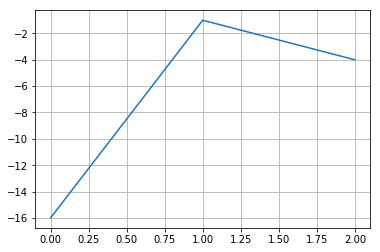

[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


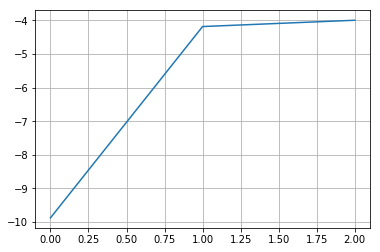

In [9]:
x, d_x, x_min = discretize(np.linspace(-3, 3, 500), 2)
x = x.reshape(-1, 1)

x_r = recover(x, d_x, x_min)
y = -x_r ** 2 + 2 * x_r - 1

xmax = x.max()

# Гиперпараметры
ro = 4
k = math.ceil(float(xmax - 1) / ro) + 1
mu = [k]
dim = 1


print("function")
plt.plot(x, y)
plt.grid(True)
plt.show()

# Сеть
n_iter = 1
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)


y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()

function


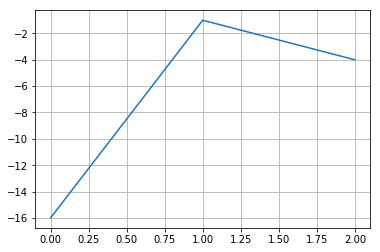

predict, iters =  1


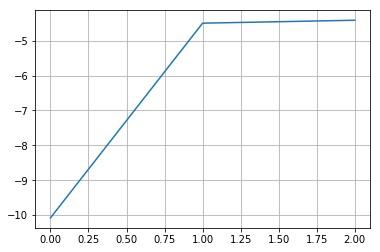

predict, iters =  20


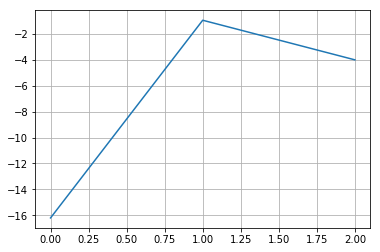

predict, iters =  40


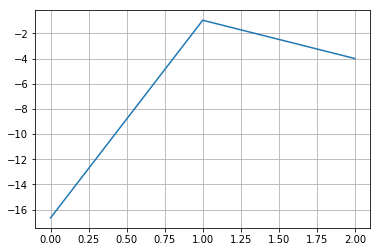

predict, iters =  100


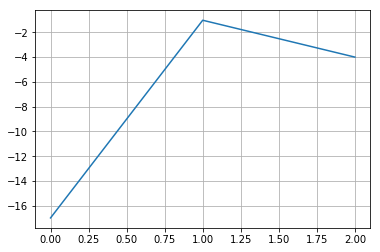

In [6]:
# Данные



x, d_x, x_min = discretize(np.linspace(-3, 3, 500), 2)
x = x.reshape(-1, 1)

x_r = recover(x, d_x, x_min)
y = -x_r ** 2 + 2 * x_r - 1

xmax = x.max()

# Гиперпараметры
ro = 4
k = math.ceil(float(xmax - 1) / ro) + 1
mu = [k]
dim = 1


print("function")
plt.plot(x, y)
plt.grid(True)
plt.show()

# Сеть
n_iter = 1
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()


n_iter = 20
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()

n_iter = 40
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()

n_iter = 100
cmac = CMAC(ro, mu, dim)
train(cmac, x, y, n_iter)

y_pred = np.array([cmac.predict(x1) for x1 in x])

print("predict, iters = ", n_iter)
plt.plot(x, y_pred)
plt.grid(True)
plt.show()

predict, iters =  0


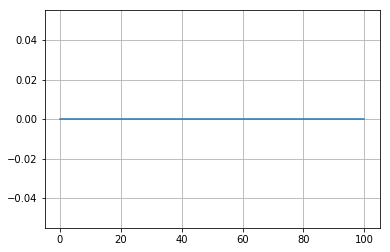

predict, iters =  1


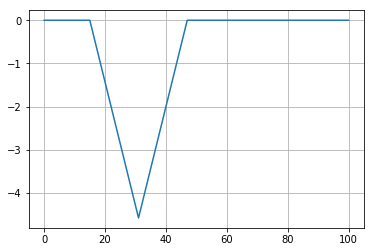

predict, iters =  2


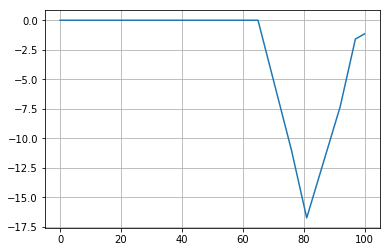

predict, iters =  3


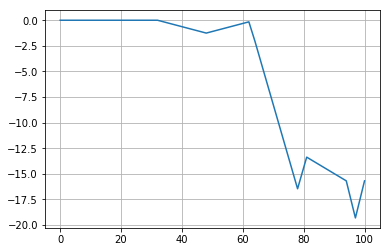

predict, iters =  4


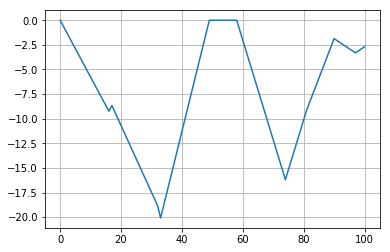

predict, iters =  5


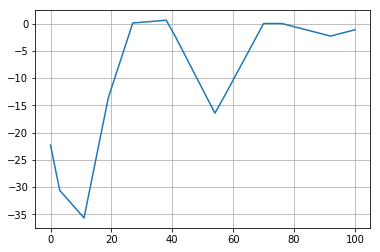

predict, iters =  6


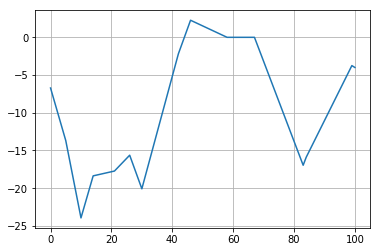

predict, iters =  7


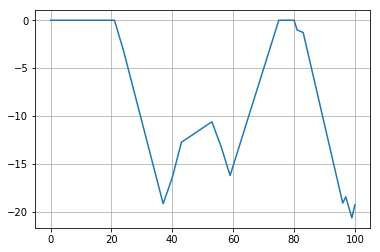

predict, iters =  8


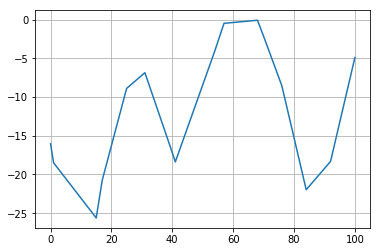

predict, iters =  9


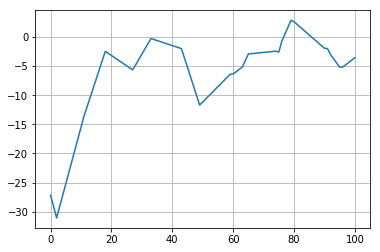

In [48]:
n_iter = 1
ro = 16
k = math.ceil(float(xmax - 1) / ro) + 1
mu = [k]
dim = 1
for i in range(10):
    cmac = CMAC(ro, mu, dim)

    train(cmac, x, y, n_iter, i)

    y_pred = np.array([cmac.predict(x1) for x1 in x])

    print("predict, iters = ", i)
    plt.plot(x, y_pred)
    plt.grid(True)
    plt.show()

### Функция двух переменных

48.35551876910178
43.1883612389279
41.5481843381112
43.900708159787236


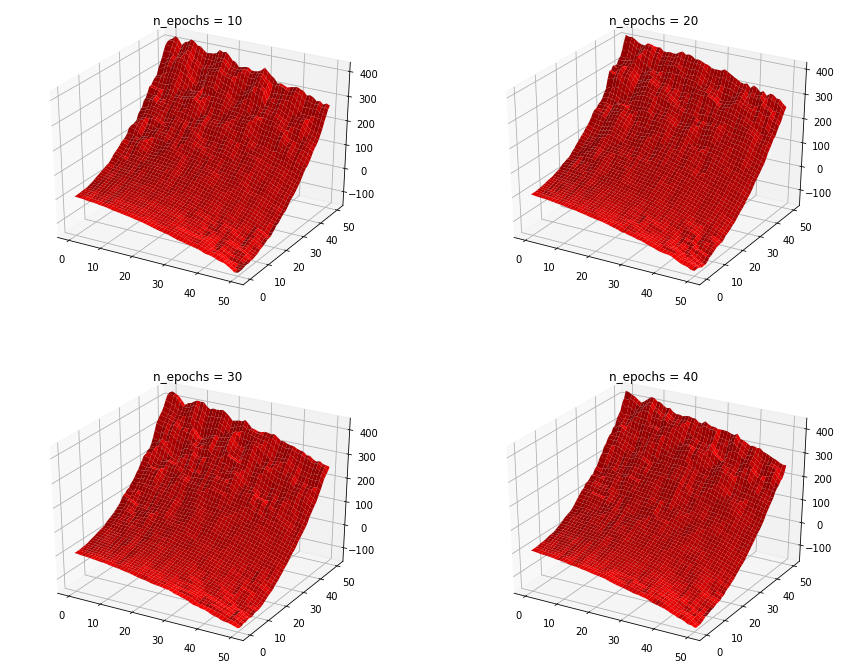

In [19]:
# Данные
n_epochs = 10
n_intervals = 50

x_raw = np.linspace(0, 10, 100)
x, d_x, x_min = discretize(x_raw, n_intervals)

y_raw = np.linspace(0, 10, 100)
y, d_y, y_min = discretize(y_raw, n_intervals)

X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]
#x^2 - 5y - 4y^2 + 5
Z = -recover(X, d_x, x_min) ** 2 - 5 * recover(X, d_x, x_min) + 4 * recover(Y, d_y, y_min) **2 + 5

# Гиперпараметры
ro = 4
mu = [x.max(), y.max()]
mu = np.array(list(map(math.ceil,
                       [ float(a - 1) / ro for a in mu ]))) + 1
dim = 2

# Обучаем сеть
fig = plt.figure(figsize=(15, 12))

cmac = CMAC(ro, mu, dim)
ax = None

for i in range(4):
    train(cmac, data, Z.reshape(-1), n_epochs)
    ax = fig.add_subplot('22{}'.format(i+1), projection='3d')
    Z_pred = np.array([ cmac.predict(x1) for x1 in data ])
    Z_pred = Z_pred.reshape(x.shape[0], y.shape[0])
    ax.plot_surface(X, Y, Z_pred, color='red')
    plt.title('n_epochs = {}'.format((i+1) * n_epochs))
    print(np.mean((Z - Z_pred) ** 2))
plt.show()
ax.plot_surface(X, Y, Z, color='blue');
#plt.plot_surface(X, Y, Z, color="blue")

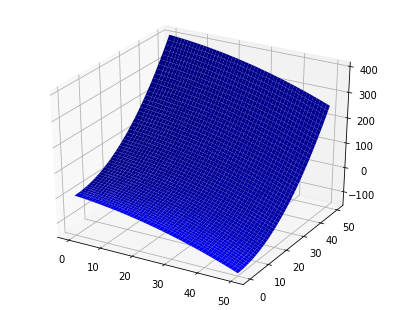

In [14]:
# Данные
n_epochs = 10
n_intervals = 50

x_raw = np.linspace(0, 10, 100)
# x_raw += np.random.normal(0, 10, len(x_raw))
# x_raw.sort()
x, d_x, x_min = discretize(x_raw, n_intervals)

y_raw = np.linspace(0, 10, 100)
# y_raw += np.random.normal(0, 10, len(y_raw))
# y_raw.sort()
y, d_y, y_min = discretize(y_raw, n_intervals)

X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]
#x^2 - 5y - 4y^2 + 5
Z = -recover(X, d_x, x_min) ** 2 - 5 * recover(X, d_x, x_min) + 4 * recover(Y, d_y, y_min) **2 + 5

# Обучаем сеть
fig = plt.figure(figsize=(15, 12))

ax = None

# for i in range(4):
#     train(cmac, data, Z.reshape(-1), n_epochs)
#     ax = fig.add_subplot('22{}'.format(i+1), projection='3d')
#     Z_pred = np.array([ cmac.predict(x1) for x1 in data ])
#     Z_pred = Z_pred.reshape(x.shape[0], y.shape[0])
#     ax.plot_surface(X, Y, Z_pred, color='red')
#     plt.title('n_epochs = {}'.format((i+1) * n_epochs))
#     print(np.mean((Z - Z_pred) ** 2))
# plt.show()
ax = fig.add_subplot('22{}'.format(i+1), projection='3d')
ax.plot_surface(X, Y, Z, color='blue');
#plt.plot_surface(X, Y, Z, color="blue")

### Базисные функции

23530.32957072001


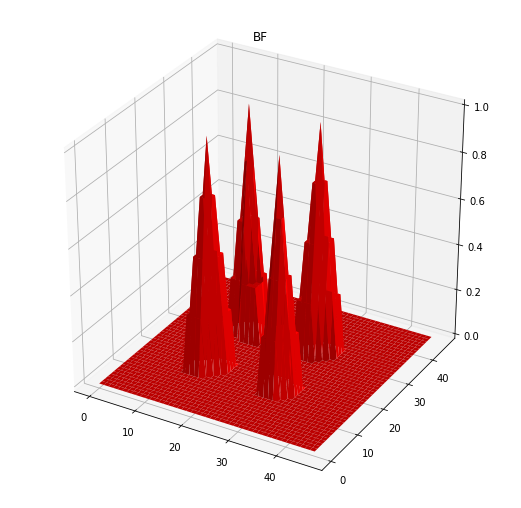

In [32]:
n_intervals = 45

x_raw = np.linspace(0, 10, 100)
x, d_x, x_min = discretize(x_raw, n_intervals)
y_raw = np.linspace(0, 10, 100)
y, d_y, y_min = discretize(y_raw, n_intervals)

X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]

# Гиперпараметры
ro = 4
mu = [x.max(), y.max()]
mu = np.array(list(map(math.ceil,
                       [ float(a - 1) / ro for a in mu ]))) + 1
dim = 2

# Обучаем сеть

cmac = CMAC(ro, mu, dim)
cmac.train_step([15,15], ro)
cmac.train_step([30,15], ro)
cmac.train_step([15,30], ro)
cmac.train_step([30,30], ro)

ax = None
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot('22{}'.format(1), projection='3d')
Z_pred = np.array([ cmac.predict(x1) for x1 in data ])
Z_pred = Z_pred.reshape(x.shape[0], y.shape[0])
ax.plot_surface(X, Y, Z_pred/ro,  color='red')
plt.title('BF')
print(np.mean((Z - Z_pred) ** 2))

### Выброс для функции с разрывом

In [112]:
# Данные
n_epochs = 10
n_intervals = 100

x_raw = np.linspace(0, 20, 100)
x, d_x, x_min = discretize(x_raw, n_intervals)
y_raw = np.linspace(0, 10, 100)
y, d_y, y_min = discretize(y_raw, n_intervals)

X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]

Z = np.zeros_like(Y)
Z[X>33] = 1
Z[Y>33] = 1
Z[X>66] = 0
Z[Y>66] = 0
Z[X<34] = 0
Z[Y<34] = 0


x_raw1 = np.linspace(0, 20, 21)
y_raw1 = np.linspace(0, 20, 21)
x_raw2 = x_raw1 - 20
y_raw2 = y_raw1 
x_raw3 = np.linspace(-20,0,21)
y_raw3 = np.zeros(21)
x_raw4 = np.linspace(0,20,21)
y_raw4 = np.zeros(21)+20
x_raw = np.concatenate((x_raw1, x_raw2, x_raw3, x_raw4))
y_raw = np.concatenate((y_raw1, y_raw2, y_raw3, y_raw4))
x, y = x_raw, y_raw
X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))

data = [(X[i, j], Y[i, j]) for i in range(x.shape[0])
                           for j in range(y.shape[0])]

Z = np.zeros_like(Y)
Z[X>10] = 1
Z[Y>10] = 1
Z[X>66] = 0
Z[Y>66] = 0
Z[X<34] = 0
Z[Y<34] = 0
# Гиперпараметры
ro = 2
mu = [x.max(), y.max()]
mu = np.array(list(map(math.ceil,
                       [ float(a - 1) / ro for a in mu ]))) + 1
dim = 2

# Обучаем сеть
fig = plt.figure(figsize=(15, 12))

cmac = CMAC(ro, mu, dim)
ax = None

for i in range(4):
    train(cmac, data, Z.reshape(-1), n_epochs)
    ax = fig.add_subplot('22{}'.format(i+1), projection='3d')
    Z_pred = np.array([ cmac.predict(x1) for x1 in data ])
    Z_pred = Z_pred.reshape(x.shape[0], y.shape[0])
    ax.plot_surface(X, Y, Z_pred, cmap = cm.coolwarm, color='red')
    plt.title('epochs = {}'.format((i+1) * n_epochs))
    print(np.mean((Z - Z_pred) ** 2))

ax.plot_surface(X, Y, Z, color='green')

TypeError: 'numpy.float64' object cannot be interpreted as an integer

<Figure size 1080x864 with 0 Axes>

In [111]:
data

[(0, 0),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 96),
 (0, 97),
 (0, 98),
 (0, 99),
 (0, 100),
 (2, 0),

In [117]:
Z.max()

0.0

In [66]:
x_raw = np.linspace(0, 20, 100)
x, d_x, x_min = discretize(x_raw, n_intervals)
y_raw = x_raw*0.5 + 10
y, d_y, y_min = discretize(y_raw, n_intervals)
X, Y = np.tile(x, (y.shape[0], 1)).T, np.tile(y, (x.shape[0], 1))


In [107]:
x_raw1 = np.linspace(0, 20, 21)
y_raw1 = np.linspace(0, 20, 21)
x_raw2 = x_raw1 - 20
y_raw2 = y_raw1 
x_raw3 = np.linspace(-20,0,21)
y_raw3 = np.zeros(21)
x_raw4 = np.linspace(0,20,21)
y_raw4 = np.zeros(21)+20
x_raw = np.concatenate((x_raw1, x_raw2, x_raw3, x_raw4))
y_raw = np.concatenate((y_raw1, y_raw2, y_raw3, y_raw4))

x, y = x_raw, y_raw


In [108]:
Z = np.zeros_like()
Z[x>y] = 1
Z[X>66] = 0
Z[Y>66] = 0
Z[X<34] = 0
Z[Y<34] = 0

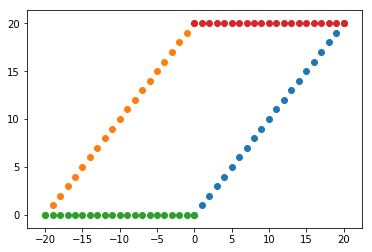

In [106]:
plt.scatter(x_raw1, y_raw1)
plt.scatter(x_raw2, y_raw2)
plt.scatter(x_raw3, y_raw3)
plt.scatter(x_raw4, y_raw4)

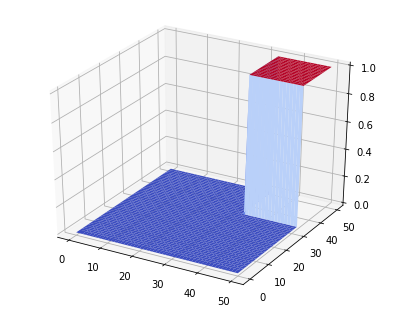

In [54]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot('22{}'.format(i+1), projection='3d')

ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, color='red')
plt.show()